# Random Forest

Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems.

Random forests or random decision forests are an ensemble learning method for classification and regression by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random forests correct for decision trees habit of overfitting to their training set.


### Random forest is a supervised learning algorithm which uses ENSEMBLE learning method for classification and regression.

### Random forest is a BAGGING technique and not a Boosting technique. The trees in Random forest are run in paralle. There is NO interaction between these trees while building the trees.

# Disadvantages of decision trees:

* They are unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree.


* They are often relatively inaccurate. Many other predictors perform better with similar data. This can be remedied by replacing a single decision tree with a random forest of decision trees, but a random forest is not as easy to interpret as a single decision tree.


* For data including categorical variables with different number of levels, information gain in decision trees is biased in favor of those attributes with more levels.


* Calculations can get very complex, particularly if many values are uncertain and/or if many outcomes are linked.


**To address these weakness, we turn to Random Forest, which illustrates the power of combining many decision trees into one model.**

# Approach of Random forest

* Each tree draws a random sample from the original data set when generating its splits, adding a further element of randomness that prevents **Overfitting**.

* The decision tree is splitted at each node based on some feature. So multiple decision tree in a random forest will splits the node on different different features. So this ensures that ensemble model does not rely too heavily on any individual feature and make fair use of all potentially predictive features.

These two modification help to prevent the tree from being too highly correlated. The **low correlation** between trees is the key. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all make a mistake in the same direction).


# Pros
The following are the advantages of Random Forest algorithm −

* It overcomes the problem of overfitting by averaging or combining the results of different decision trees.

* Random forests work well for a large range of data items than a single decision tree does.

* Random forest has less variance then single decision tree.

* Random forests are very flexible and possess very high accuracy.

* Scaling of data does not require in random forest algorithm. It maintains good accuracy even after providing data without scaling.

* Random Forest algorithms maintains good accuracy even a large proportion of the data is missing.


# Cons
The following are the disadvantages of Random Forest algorithm −

* Complexity is the main disadvantage of Random forest algorithms.

* Construction of Random forests are much harder and time-consuming than decision trees.

* More computational resources are required to implement Random Forest algorithm.

* It is less intuitive in case when we have a large collection of decision trees.

* The prediction process using random forests is very time-consuming in comparison with other algorithms.

# Random Forest Classifier through Python

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv('datasets/pima-indians-diabetes.data.csv', header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [3]:
#split dataset in features and target variable
Predictors = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
TargetVariable='label'
X = pima[Predictors] # Features
y = pima.label # Target variable

In [4]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# 70% training and 30% test

### Building Random Forest Model
Let's create a Random Forest Model using Scikit-learn.

In [7]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, n_estimators=200,criterion='entropy')

# Printing all the parameters of Random Forest
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [8]:
# Creating the model on Training Data
RF = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = RF.predict(X_test)

In [9]:
# Measuring accuracy on Testing Data

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       146
           1       0.79      0.54      0.64        85

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231

[[134  12]
 [ 39  46]]


In [10]:
# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the model : 0.779


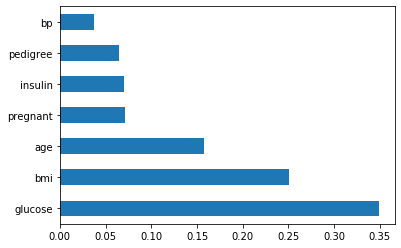

In [11]:
# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [12]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=y_pred
TestingDataResults.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree,TargetColumn,Predictedlabel
285,7,135,26.0,51,136,74,0.647,0,0
101,1,0,26.1,22,151,60,0.179,0,0
581,6,0,25.0,27,109,60,0.206,0,0
352,3,0,34.4,46,61,82,0.243,0,0
726,1,180,36.1,25,116,78,0.496,0,0


### Plotting one of the Decision Trees in Random Forest

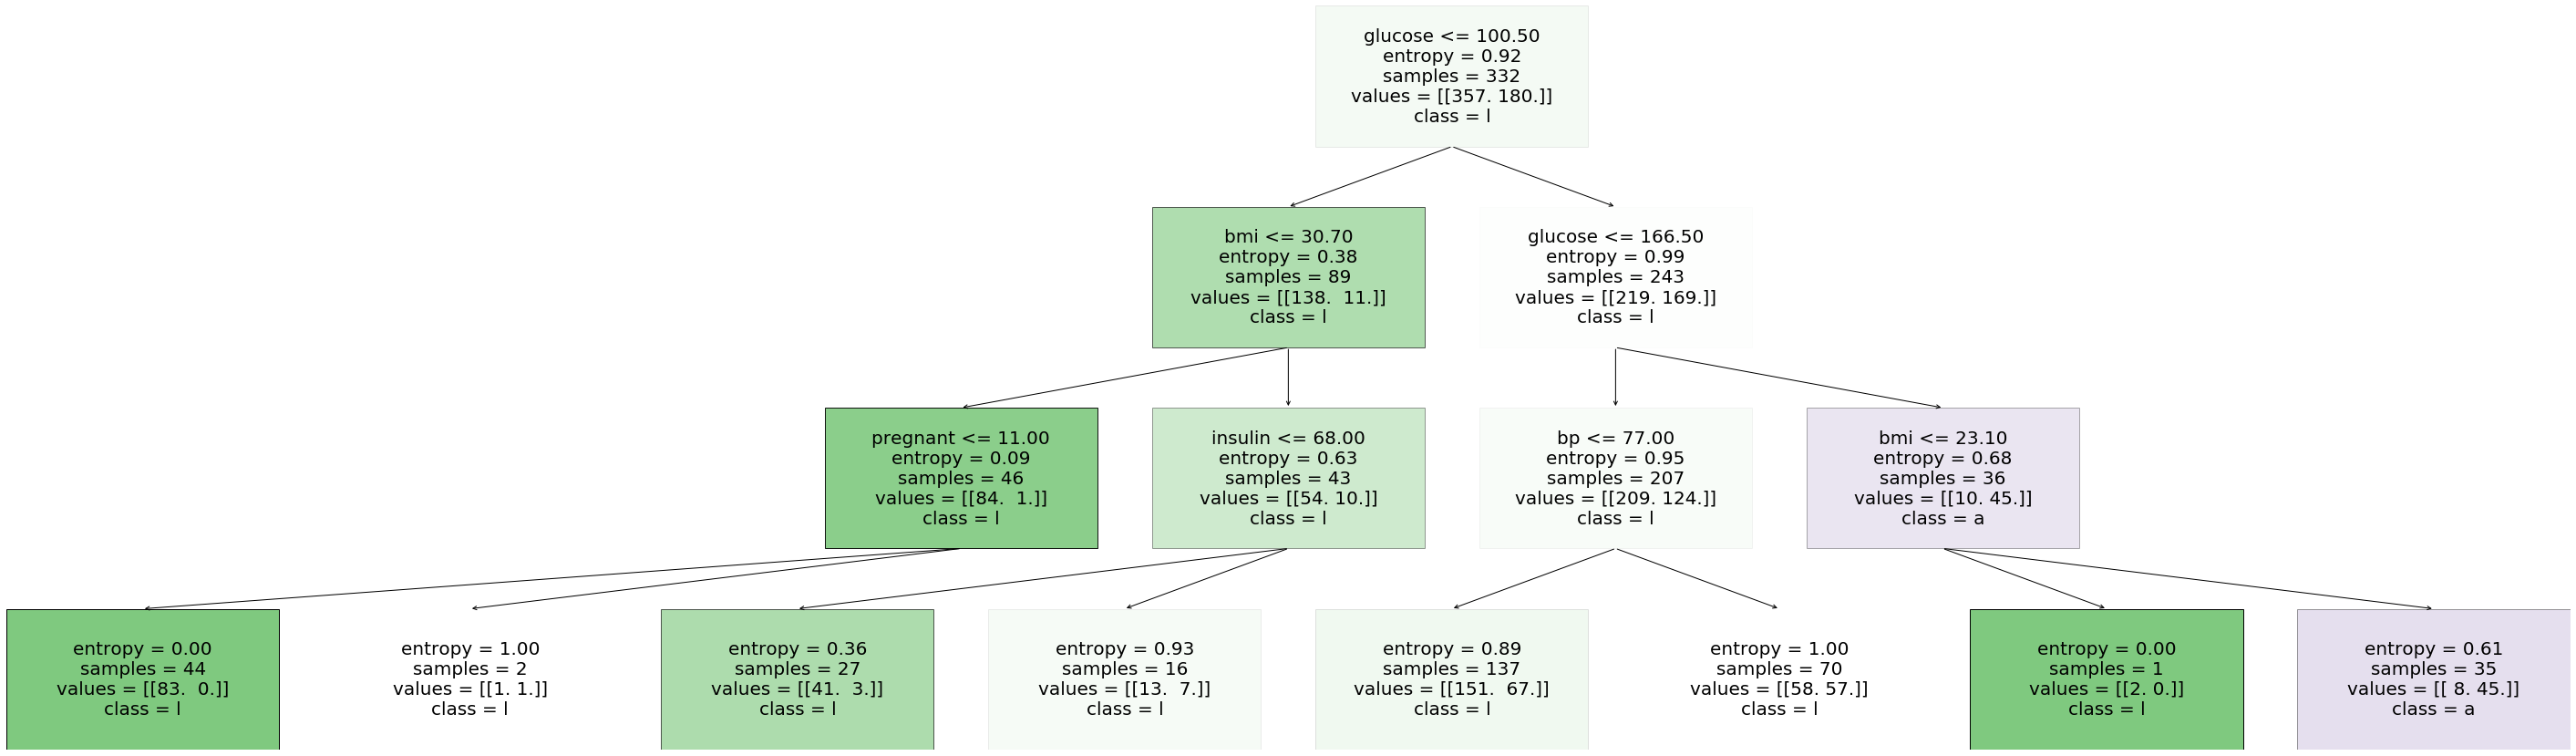

In [13]:
# PLotting 10th single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# Refrence:
* https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_random_forest.htm